## n-d Expansions

** the notes in this notebook were taken from [1].

The multi-dimensional basis functions are orthogonal when the uncertain variables are independent.
The values of the elements $\ i_j$ of the multi-index depend on how the expansion is truncated, i.e., on how the index set $\ \mathcal{I}_p$ is defined. The two common ways to define the index set are total-order expansion, and tensor-product expansion.

In total-order expansion a total polynomial order bound \(p\) is enforced:

\begin{align}
	\mathcal{I}_p = \{\boldsymbol i:|\boldsymbol i| \leq p \}, \qquad |\boldsymbol i|=i_1+i_2+\cdots +i_n\\.
\end{align}

For a second-order expansion $\ p=2$ over two uncertain dimensions $\ n=2$, the index set is

\begin{equation}
  \mathcal{I}_p = \left \{\begin{array}{c}
	(i_1=0,i_2=0),(i_1=1,i_2=0),(i_1=0,i_2=1),\\
    (i_1=2,i_2=0),(i_1=1,i_2=1),(i_1=0,i_2=2)
\end{array}\right \},
\end{equation}

which produces the following multi-dimensional basis polynomials from $1$-dimensional Hermite polynomials that correspond to Normal uncertain variables:

\begin{equation}
\begin{alignedat}{2}
  \Phi_\mathbf{0}(\boldsymbol\xi) & = \phi_0(\xi_1) \phi_0(\xi_2) & & = 1 \\
  \Phi_\mathbf{1}(\boldsymbol\xi) & = \phi_1(\xi_1) \phi_0(\xi_2) & & = \xi_1 \\
  \Phi_\mathbf{2}(\boldsymbol\xi) & = \phi_0(\xi_1) \phi_1(\xi_2) & & = \xi_2 \\
  \Phi_\mathbf{3}(\boldsymbol\xi) & = \phi_2(\xi_1) \phi_0(\xi_2) & & = \xi_1^2-1 \\
  \Phi_\mathbf{4}(\boldsymbol\xi) & = \phi_1(\xi_1) \phi_1(\xi_2) & & = \xi_1 \xi_2 \\
  \Phi_\mathbf{5}(\boldsymbol\xi) & = \phi_0(\xi_1) \phi_2(\xi_2) & & = \xi_2^2-1.
\end{alignedat}
\end{equation}


The resulting polynomial approximation is
\begin{equation}
  \hat{R}(\boldsymbol\xi) = \sum_{\boldsymbol i=\mathbf{0}}^{\mathbf{5}}\alpha_\boldsymbol i \Phi_\boldsymbol i(\boldsymbol\xi) = \alpha_{\mathbf{0}} \Phi_\mathbf{0}(\boldsymbol\xi) + \alpha_{\mathbf{1}} \Phi_\mathbf{1}(\boldsymbol\xi) + \cdots + \alpha_{\mathbf{5}} \Phi_\mathbf{5}(\boldsymbol\xi).
\end{equation}

The total number of terms in an expansion of total order \(p\) and involving \(n\) uncertain variables is given by

\begin{equation}
	N_{TO} = \frac{(n+p)!}{n!p!}.
\end{equation}


### Chaospy Implementation

#### Installaion


In [ ]:
pip install chaospy

pip install scikit-learn

# Documentation: https://media.readthedocs.org/pdf/chaospy/master/chaospy.pdf

    

In [4]:
import numpy as np
import chaospy as cp
import matplotlib.pyplot as plt

# create distribution for random variables
var1 = cp.Normal(0,1)
var2 = cp.Normal(0,1)

dist = cp.J(var1, var2)   # cdf of Norormaly distributed random variables 
# dist = cp.Iid(cp.Normal(0,1), 2) # if they share the same distribution

# Orthogonal Polynomial Expansion
expansion  = cp.orth_ttr(2, dist) # second order expansion for two random variables read the docs (ttr = three term Stiltjes recursion for total order expansion) 

print expansion

[1.0, q1, q0, -1.0+q1^2, q0q1, q0^2-1.0]


In tensor-product expansion a per-dimension polynomial order bound \(p_j\) is enforced

\begin{equation}
	\mathcal{I}_p = \{\boldsymbol i:i_j \leq p_j, \; j=1,\ldots ,n \}.
\end{equation}

For a second-order expansion \(p=2\) over two uncertain dimensions \(n=2\), the index set is
\begin{equation}
  \mathcal{I}_p = \left \{\begin{array}{c}
	(i_1=0,i_2=0),(i_1=1,i_2=0),(i_1=2,i_2=0),\\
	(i_1=0,i_2=1),(i_1=1,i_2=1),(i_1=2,i_2=1),\\
    (i_1=0,i_2=2),(i_1=1,i_2=2),(i_1=2,i_2=2)
\end{array}\right \}
\end{equation}
which produces the following multi-dimensional basis polynomials:

\begin{equation}
\begin{alignedat}{2}
  \Phi_\mathbf{0}(\boldsymbol\xi) & = \phi_0(\xi_1) \phi_0(\xi_2) & & = 1 \\
  \Phi_\mathbf{1}(\boldsymbol\xi) & = \phi_1(\xi_1) \phi_0(\xi_2) & & = \xi_1 \\
  \Phi_\mathbf{2}(\boldsymbol\xi) & = \phi_2(\xi_1) \phi_0(\xi_2) & & = \xi_1^2-1 \\
  \Phi_\mathbf{3}(\boldsymbol\xi) & = \phi_0(\xi_1) \phi_1(\xi_2) & & = \xi_2 \\
  \Phi_\mathbf{4}(\boldsymbol\xi) & = \phi_1(\xi_1) \phi_1(\xi_2) & & = \xi_1 \xi_2 \\
  \Phi_\mathbf{5}(\boldsymbol\xi) & = \phi_2(\xi_1) \phi_1(\xi_2) & & = (\xi_1^2-1)\xi_2 \\
  \Phi_\mathbf{6}(\boldsymbol\xi) & = \phi_0(\xi_1) \phi_2(\xi_2) & & = \xi_2^2-1 \\
  \Phi_\mathbf{7}(\boldsymbol\xi) & = \phi_1(\xi_1) \phi_2(\xi_2) & & = \xi_1 (\xi_2^2-1) \\
  \Phi_\mathbf{8}(\boldsymbol\xi) & = \phi_2(\xi_1) \phi_2(\xi_2) & & = (\xi_1^2-1) (\xi_2^2-1).
\end{alignedat}
\end{equation}

The last column depends on the type of the univariate polynomials, the $1$-dimensional Hermite polynomials that correspond to Normal uncertain variables are shown again.
The corresponding tensor-product polynomial approximation is
\begin{equation}
  \hat{R}(\boldsymbol\xi) = \sum_{\boldsymbol i=\mathbf{0}}^{\mathbf{8}}\alpha_\boldsymbol i \Phi_\boldsymbol i(\boldsymbol\xi) = \alpha_{\mathbf{0}} \Phi_\mathbf{0}(\boldsymbol\xi) + \alpha_{\mathbf{1}} \Phi_\mathbf{1}(\boldsymbol\xi) + \cdots + \alpha_{\mathbf{8}} \Phi_\mathbf{8}(\boldsymbol\xi).
\end{equation}
The total number of terms for the tensor-product expansion is given by
\begin{equation}
	N_{TP} = \prod_{i=1}^n (p_i+1).
\end{equation}

Note that for both expansion schemes, the number of terms exhibits an exponential increase with an increase in the number of uncertain dimensions \(n\). The Tensor-product expansion is the preferred approach when the coefficients are computed with quadrature because of increased monomial coverage and accuracy. The Total-order expansion is the preferred approach when the coefficients are computed with regression because it keeps the sampling requirements lower[1].


In [ ]:
# Chaospy does not support tensor product expansion. Create one!

### Mean and variance from the polynomial chaos expansion

In most physics and engineering problems we are usually interested in the first two statistical moments  - mean, and varience. The statistics of the multi-dimensional polynomial chaos expansion are functions of the expansion coefficients.

\begin{equation}
  \mu_R = \alpha_{\mathbf{0}}
\end{equation}
and
\begin{align}
\sigma_{R}^{2} = \sum_{\boldsymbol i\in \mathcal{I}_p\setminus \mathbf{\{0\}}}
\alpha_{\boldsymbol i}^2 \langle \Phi_\boldsymbol i ^2(\boldsymbol\xi)\rangle,
\end{align}
where $\ 0$ is the first multi-index &mdash; the one with all zero elements.


In [19]:
# coefficients
q0, q1 = cp.variable(2)  # chaospy uses 'q' as the default independent variable

mean = np.array([cp.E(q0, dist), cp.E(q1, dist)])    # mean/expected value
std = np.array([cp.Std(q0, dist), cp.Std(q1, dist)])   # variance

print 'mean: %s, variance: %s' % (mean, std)

mean: [ 0.  0.], variance: [ 1.  1.]



###  Calculating polynomial chaos coefficients


The coefficients of the polynomial chaos expansion

\begin{equation}
  R(\boldsymbol \xi) \approx \hat{R}(\boldsymbol \xi) = \sum_{\boldsymbol i\in \mathcal{I}_p} \alpha_\boldsymbol i \Phi_\boldsymbol i(\boldsymbol \xi).
  \end{equation}

can be calculated via quadrature or by linear regression. The quadrature approach is also known as non-intrusive spectral projection, spectral projection, pseudospectral, stochastic Galerkin, etc. The regression approach is sometimes also referred to as stochastic response surfaces, point collocation or compressed sensing.


#### Quadrature
To obtain the coefficients of the polynomial chaos expansion

\begin{equation}
  R(\boldsymbol \xi) = \sum_{\boldsymbol i\in \mathcal{I}_p}  \alpha_\boldsymbol i \Phi_\boldsymbol i(\boldsymbol \xi),
\end{equation}

via quadrature, we take the inner product of both sides with respect to $\ \Phi_\mathbf{j}(\boldsymbol \xi)$ to yield

\begin{equation}
  \langle R,\Phi_\mathbf{j}\rangle = \sum_{\boldsymbol i\in \mathcal{I}_p}  \alpha_\boldsymbol i  \langle\Phi_\boldsymbol i, \Phi_\mathbf{j}\rangle.
\end{equation}

Making use of the orthogonality of the polynomials

\begin{equation}
  \langle\Phi_\boldsymbol i, \Phi_\mathbf{j}\rangle =
  \begin{cases}
    0 & \text{for } i\neq j \\
	\langle\Phi_\boldsymbol i, \Phi_\boldsymbol i\rangle =
      \langle\Phi_\boldsymbol i^2\rangle & \text{for } i = j.
  \end{cases}
\end{equation}

and solving for the coefficients, we obtain

\begin{equation}
  \alpha_\boldsymbol i = \frac{\langle R(\boldsymbol \xi),\Phi_\boldsymbol i(\boldsymbol \xi)\rangle}{\langle\Phi_\boldsymbol i^2(\boldsymbol \xi)\rangle} =
  \frac{1}{{\langle\Phi_\boldsymbol i^2(\boldsymbol \xi)\rangle}}
  \int_\Omega R(\boldsymbol \xi) \Phi_\boldsymbol i(\boldsymbol \xi) \rho(\boldsymbol \xi)\, d\boldsymbol \xi,
\end{equation}

where the domain of $\ \Omega$ is the Cartesian product of $1D$ domains $\ \Omega_j$ for each dimension, $\ \Omega = \Omega_1 \times \cdots \times \Omega_n$, and $\ \rho(\boldsymbol \xi) = \prod_{j=1}^n\rho_j(\xi_j)$ is the joint probability density of the stochastic parameters. Most of the computational expense in solving for the coefficients resides in evaluating the model $\ R(\boldsymbol \xi)$ in the multi-dimensional integral

\begin{equation}
  \int_\Omega R(\boldsymbol \xi) \Phi_\boldsymbol i(\boldsymbol \xi)
  \rho(\boldsymbol \xi)\, d\boldsymbol \xi.
\end{equation}

This integral is solved with quadrature (numerical integration).  We discuss two multi-dimensional quadrature approaches, tensor product quadrature and sparse grid quadrature.
Note that the zero coefficient in reduces to the definition of the mean

\begin{equation}
  \mu_R = \alpha_0 = \int_\Omega R(\boldsymbol \xi) \rho(\boldsymbol \xi)\, d\boldsymbol \xi,
\end{equation}

which the direct numerical integration methods attempt to compute directly.


#### Regression

To obtain the coefficients of the polynomial chaos expansion

\begin{equation}
  R(\boldsymbol \xi) = \sum_{\boldsymbol i\in \mathcal{I}_p}  \alpha_\boldsymbol i \Phi_\boldsymbol i(\boldsymbol \xi),
\end{equation}

via regression, we construct a linear system

\begin{equation}
  \boldsymbol \Phi \boldsymbol \alpha = R
\end{equation}

and solve for the coefficients $\ \boldsymbol \alpha$ that best represent a set of responses $R$. The set of responses is generated by evaluating the model at $m$ uncertain vectors $\ \boldsymbol \xi$. The uncertain vectors are most commonly chosen by sampling the density of the uncertain variables. Different sampling methods can be used.

%or you can picked them to be the quadrature points which under certain conditions the coefficients obtained from the regression will be the same as from quadrature. I think the machine learning book has some details.

Each row of the matrix $\ \boldsymbol \Phi$ contains the orthogonal polynomials $\ \Phi_\boldsymbol j$ evaluated at a sample $\ \boldsymbol \xi_i$



\begin{equation}
  \begin{bmatrix}
    \Phi_\mathbf{0}(\boldsymbol \xi_1) & \cdots & \Phi_\mathbf{n-1}(\boldsymbol \xi_1) \\
    \vdots & \ddots & \vdots \\
    \Phi_\mathbf{0}(\boldsymbol \xi_m)  &\cdots & \Phi_\mathbf{n-1}(\boldsymbol \xi_m)
  \end{bmatrix}
  \begin{bmatrix}
    \alpha_0 \\
    \vdots \\
    \alpha_{n-1}
    \end{bmatrix}
    =
  \begin{bmatrix}
    R_1 \\
    \vdots \\
    R_m
  \end{bmatrix}.
\end{equation}

The size of the $\ m \times n$ matrix is determined by the number of samples $m$ and by how the polynomial chaos expansion is truncated which results in $n$ terms. It is common to specify a total order expansion along with a collocation ratio\footnote{Collocation ratio derives from collocation points which some authors use to refer to the sample points.} $\ cr = m/n$ to determine the number of samples $m$. The collocation ratio determines if the system is overdetermined $\ cr > 1$ or underdetermined $\ cr < 1$.

The most popular method to estimate the coefficients is \textit{least squares}, in which we pick coefficients $\ \boldsymbol \alpha=(\alpha_0, \alpha_1, \dots, \alpha_{n-1})$ that minimize the residual sum of squares

\begin{equation}
  \boldsymbol \alpha = \text{arg min } ||\boldsymbol \Phi\boldsymbol \alpha - R||_2^2.
\end{equation}

This problem has a closed-form solution obtained by solving the normal equations~\citep{Trefethench111997}

\begin{equation}
  \boldsymbol \alpha = {(\boldsymbol \Phi^T \boldsymbol \Phi)}^{-1} \boldsymbol \Phi^T R.
\end{equation}

For underdetermined systems, \cref{eq:linearsystem} has many solutions and we need to further constrain the problem. This can be done be setting a constraint on the coefficients

\begin{equation}
  \boldsymbol \alpha = \text{arg min } ||\boldsymbol \Phi\boldsymbol \alpha - R||_2^2, \qquad \text{such that } ||\boldsymbol \alpha||_p \leq t.
\end{equation}

This constrained problem is equivalent to the regularized least squares problem

\begin{equation}
  \boldsymbol \alpha = \text{arg min } ||\boldsymbol \Phi\boldsymbol \alpha - R||_2^2 + \lambda ||\boldsymbol \alpha||_p^p.
 \end{equation}

#### Example problem


\begin{equation}
\ U(x) = Ie^{-ax}\\
\ where \quad a \sim U(0, 0.1), \quad and \quad I\sim U(8,10)
\end{equation}

21


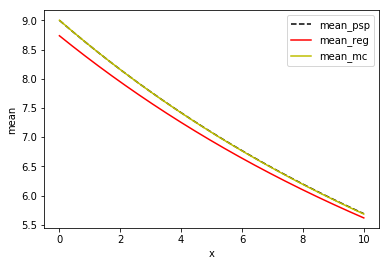

In [81]:
import chaospy as cp
import numpy as np
import matplotlib.pyplot as plt

# The model
def U(x, a, I):
    return I*np.exp(-a*x)

x = np.linspace(0, 10, 1000)


# Distributions:
a = cp.Uniform(0, 0.1)
I = cp.Uniform(8, 10)
dist = cp.J(a, I)        # Joint distibution


# Monte Carlo for comparison
samples = dist.sample(10**5)  
U_mc = [U(x, *s) for s in samples.T]

mean_mc = np.mean(U_mc, 0)
var_mc = np.var(U_mc, 0)
# print "Mean_mc",mean


# Pseudo-Spectral projection
order = 5
poly1, norms = cp.orth_ttr(order, dist, retall=True)                #polynomila and norms
nodes, weights = cp.generate_quadrature(order+1, dist, rule="G")    # nodes and weights for gaissian quadrature

solves = [U(x, s[0], s[1]) for s in nodes.T]
U_hat = cp.fit_quadrature(poly1, nodes, weights, solves, norms=norms)

mean_psp = cp.E(U_hat, dist)
var_psp = cp.Var(U_hat, dist)


# Regression
order = 5
poly2 = cp.orth_ttr(order, dist)
nodes2 = dist.sample(2*len(poly2), "H")
solves = [U(x, s[0], s[1]) for s in nodes2.T]
U_hat = cp.fit_regression(poly2, nodes2, solves, rule="T")

print len(poly2)
mean_reg = cp.E(U_hat, dist)
var_reg = cp.Var(U_hat, dist)

plt.figure(1)
plt.plot(x, mean_psp, "k--", label="mean_psp")
plt.plot(x, mean_reg, "r", label="mean_reg")
plt.plot(x, mean_mc, "y", label="mean_mc")
plt.xlabel("x")
plt.ylabel("mean")
plt.legend()
plt.show()


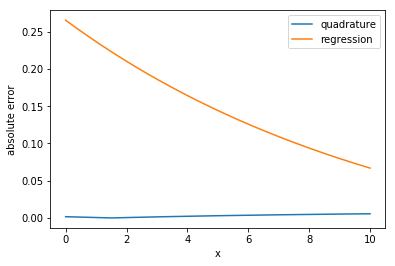

In [84]:
error1 = np.abs(mean_psp - mean_mc)
error2 = np.abs(mean_reg - mean_mc)

plt.plot(x, error1, label="quadrature")
plt.plot(x, error2, label="regression")
plt.xlabel("x")
plt.ylabel("absolute error")
plt.legend()
plt.show()

# print error

## References

[1] A. Santiago Padrón, PJ Stanley, Jared Thomas, Juan J. Alonso, and Andrew Ning: Polynomial chaos to efficiently compute the annual energy production in wind farm layout optimization, 2017.

[2] Dongbin Xui. Numerical Methods for Stochastic Computations.

[3]  Sarkar, Sunetra, and Jeroen A. S Witteveen. Uncertainty Quantification In Computational Science.